In [ ]:
from analysis_utils import image2stack
from inout import corp_save
from glob import glob
from tifffile import imwrite

import matplotlib.pyplot as plt
import numpy as np
import os

In [17]:
root_path = '/home/wrx/Data_WF/WF_WRX/'

mouse_id = 'H1'
date = '20250310'
treatment = 'DOM'

treatment_folder = os.path.join(root_path, mouse_id, date, treatment)
print(treatment_folder)

/home/wrx/Data_WF/WF_WRX/H1/20250310/DOM


In [ ]:
def image2stack(folder_path, preview=None):
    '''
    preview: the number of images to preview, int or None
    '''
    folder_name = os.path.basename(folder_path)
    image_path_ls = glob(pjoin(folder_path, '*.tif'))
    image_path_ls = sorted(image_path_ls, key=filename2int) # to make sure the images are in the right order
    if preview is None:
        image_stack = [imread(tiff) for tiff in log_progress(image_path_ls, name=folder_name)]
    else:
        image_stack = [imread(tiff) for tiff in log_progress(image_path_ls[:preview], name=folder_name)]

    return np.array(image_stack)

In [18]:
# Reading the images
chan1_folder = glob(os.path.join(treatment_folder, '*-470'))[0]
chan2_folder = glob(os.path.join(treatment_folder, '*-405'))[0]
chan1_images = image2stack(chan1_folder)
chan2_images = image2stack(chan2_folder)

Crop parameter setting

In [19]:
def show_one_image(image):
    figsize = (5, 5)
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    ax.grid()
    plt.show()

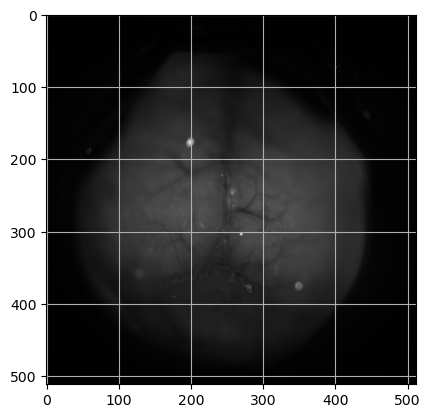

In [20]:
show_one_image(chan1_images[0])

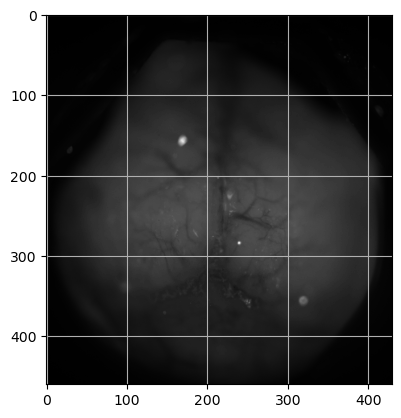

In [57]:
top, left, bottom, right = 20, 30, 480, 460
ref_image = chan1_images[0][top:bottom, left:right]
show_one_image(ref_image)


In [58]:
imwrite(os.path.join(treatment_folder, 'reference.tif'), ref_image)

Save the parameter

In [ ]:
parameters_path = os.path.join(treatment_folder, 'parameters.npy')
if os.path.exists(parameters_path):
    print('The parameters file exists')
    parameters = np.load(parameters_path, allow_pickle=True).item()
else:
    print('The parameters file does not exist')
    parameters = {}

parameters['crop'] = (top, left, bottom, right)
np.save(parameters_path, parameters)

The parameters file does not exist


Save the corpped image as tiff file

In [ ]:
crop_save(treatment_folder, parameters=(top, left, bottom, right))